In [1]:
import os

In [2]:
# check if already in right local directory
# otherwise clone the repo from github and change directory

cwd = os.getcwd()
print(os.path.split(cwd))

if not os.path.split(cwd)[1] == "MA":
    !git clone https://www.github.com/JohnnyNewman/MA.git
    os.chdir('MA')

('C:\\Users\\Nils\\Workspace\\MA_git', 'MA')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.decomposition import PCA
import pickle

### First, load the data:

In [4]:
dv_list = pickle.load(open("save/T006/dv_list.p", "rb"))
df_result = pd.read_excel("save/T006/df_result.xlsx")
df_cd_grad = pd.read_excel("save/T006/df_cd_grad.xlsx")


In [ ]:
dv_list = pickle.load(open("save/T006/dv_list.p", "rb"))
df_result = pd.read_excel("save/T006/df_result.xlsx")
df_cd_grad = pd.read_excel("save/T006/df_cd_grad.xlsx") 

In [5]:
df_result #, df_result.shape

,Unnamed: 0,DIR,c_L,c_D,rms_rho,rms_nu,AOA
0,0,T006 DSN_000,0.712967,0.060632,-4.977940,-5.366283,5.622905
1,1,T006 DSN_001,0.724184,0.018179,-6.424451,-8.215098,3.673885
2,2,T006 DSN_002,0.724241,0.012951,-6.452422,-8.123596,1.245573
3,3,T006 DSN_003,0.724184,0.018523,-6.395492,-8.374623,2.102441
4,4,T006 DSN_004,0.724207,0.013087,-6.535674,-8.658059,2.780464
...,...,...,...,...,...,...,...
995,995,T006 DSN_995,0.723134,0.030137,-6.175512,-6.857003,2.950256
996,996,T006 DSN_996,0.724201,0.018668,-6.426329,-8.284552,2.422116
997,997,T006 DSN_997,0.724063,0.027954,-6.543067,-7.889432,2.725608
998,998,T006 DSN_998,0.724212,0.022010,-6.407270,-8.054449,2.908295


In [6]:
aoa = df_result["AOA"]

In [10]:
N = df_result.shape[0]

In [7]:
df_cd_grad

,Unnamed: 0,VAR,CD_GRAD,STEP,DIR
0,0,0,0.761449,0.001,T006 DSN_000
1,1,1,0.753202,0.001,T006 DSN_000
2,2,2,0.645545,0.001,T006 DSN_000
3,3,3,0.502804,0.001,T006 DSN_000
4,4,4,0.356495,0.001,T006 DSN_000
...,...,...,...,...,...
37995,33,33,-0.448886,0.001,T006 DSN_999
37996,34,34,-0.264682,0.001,T006 DSN_999
37997,35,35,-0.084116,0.001,T006 DSN_999
37998,36,36,0.204847,0.001,T006 DSN_999


### Then the non-converged results (rms_rho < -6) are removed from the dataset:

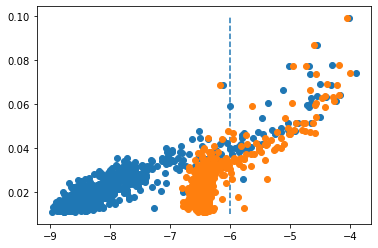

In [8]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o", label="nu")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")
plt.vlines([-6], 0.01, 0.1, ls="--")

In [40]:
sim_converged = df_result["rms_rho"] < -6

dv_mat = np.asarray(dv_list)[sim_converged]
c_D = df_result["c_D"].values[sim_converged]
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((N, 38)))[sim_converged]
aoa = aoa[sim_converged]

In [12]:
d_CD

array([[ 0.621198 ,  0.638195 ,  0.582739 , ..., -0.0946435,  0.303852 ,
        -0.0358609],
       [ 1.02982  ,  0.972347 ,  0.787893 , ..., -0.0362501, -0.0067322,
        -0.0577502],
       [ 1.17377  ,  1.13068  ,  0.952909 , ..., -0.0334564,  0.157533 ,
         0.0435074],
       ...,
       [ 1.18327  ,  1.17908  ,  1.03277  , ..., -0.210642 ,  0.105212 ,
         0.834902 ],
       [ 0.951534 ,  0.914583 ,  0.754744 , ..., -0.293871 , -0.182783 ,
        -0.0751327],
       [ 1.1175   ,  1.07552  ,  0.900379 , ..., -0.0841159,  0.204847 ,
         0.806494 ]])

In [11]:
d_CD.shape[0]

924

### Calculation of the covariance matrix and eigenvalue decomposition:

In [13]:
C = np.zeros((38,38))
for i in range(d_CD.shape[0]):
    C += np.outer(d_CD[i], d_CD[i])
C = C / d_CD.shape[0]

In [14]:
i = 0
np.outer(d_CD[i], d_CD[i]), d_CD[i]*d_CD[0,i]

(array([[ 0.38588696,  0.39644546,  0.3619963 , ..., -0.05879235,
          0.18875225, -0.02227672],
        [ 0.39644546,  0.40729286,  0.37190112, ..., -0.06040101,
          0.19391683, -0.02288625],
        [ 0.3619963 ,  0.37190112,  0.33958474, ..., -0.05515246,
          0.17706641, -0.02089755],
        ...,
        [-0.05879235, -0.06040101, -0.05515246, ...,  0.00895739,
         -0.02875762,  0.003394  ],
        [ 0.18875225,  0.19391683,  0.17706641, ..., -0.02875762,
          0.09232604, -0.01089641],
        [-0.02227672, -0.02288625, -0.02089755, ...,  0.003394  ,
         -0.01089641,  0.001286  ]]),
 array([ 0.38588696,  0.39644546,  0.3619963 ,  0.31247129,  0.26217227,
         0.2192568 ,  0.18811925,  0.17037225,  0.16553125,  0.17172398,
         0.18643208,  0.20713909,  0.23156522,  0.25692687,  0.27682074,
         0.27162628,  0.17839937, -0.20597994, -1.41561706,  4.11382785,
         3.66693801,  2.87701642,  2.01840897,  1.20559002,  0.49782497,
        

In [15]:
### Bishop 2006 PRML p. 83
d_CD_mean = d_CD.mean(axis=0)
np.outer(d_CD_mean, d_CD_mean)[:2,:3], d_CD_mean[0]*d_CD_mean[0], d_CD_mean[0]*d_CD_mean[1], d_CD_mean[1]*d_CD_mean[2]

(array([[0.97315565, 0.9517748 , 0.8087411 ],
        [0.9517748 , 0.93086371, 0.79097255]]),
 0.9731556467110306,
 0.9517748023024036,
 0.7909725452580179)

In [16]:
d_CD_mean

array([ 9.86486516e-01,  9.64812784e-01,  8.19819719e-01,  6.34639355e-01,
        4.49469746e-01,  2.87190260e-01,  1.59836398e-01,  7.13345754e-02,
        1.95017368e-02, -1.90527935e-03, -1.04513224e-03,  1.39191743e-02,
        3.59689089e-02,  5.89989018e-02,  7.53746153e-02,  6.92051951e-02,
       -1.97764085e-03, -2.64318326e-01, -1.12017764e+00,  3.53801868e+00,
        3.30605245e+00,  2.76209467e+00,  2.13110599e+00,  1.50945220e+00,
        9.47519637e-01,  4.70238986e-01,  8.60121402e-02, -2.06886347e-01,
       -4.14592598e-01, -5.43134137e-01, -5.96537147e-01, -5.78759945e-01,
       -4.98787211e-01, -3.74542431e-01, -2.27646371e-01, -6.51526715e-02,
        1.32341719e-01,  3.76482275e-01])

In [17]:
#C = C - d_CD_mean

In [18]:
d_CD[i].reshape(1, -1).T @ d_CD[i].reshape(1, -1) - np.outer(d_CD[i], d_CD[i])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
C = np.dot(d_CD.T, d_CD) / d_CD.shape[0]

In [20]:
n_samples = d_CD.shape[0]

In [21]:
C.shape

(38, 38)

In [22]:
#covariance.shape

In [23]:
from scipy.linalg import svd

In [24]:
U, S, Vt = linalg.svd(C)

In [25]:
U[:,0]

array([-0.09546604, -0.09707783, -0.0865084 , -0.07157038, -0.05614313,
       -0.04251905, -0.03197743, -0.0250159 , -0.02152232, -0.02096126,
       -0.02257665, -0.02556765, -0.02916024, -0.03245446, -0.03381973,
       -0.02921547, -0.00732753,  0.06633861,  0.30929228, -0.50750414,
       -0.48139942, -0.40695831, -0.31799235, -0.22926729, -0.14861798,
       -0.08006787, -0.0252182 ,  0.01581324,  0.04366366,  0.05927555,
        0.06385514,  0.05924511,  0.0483919 ,  0.03515412,  0.02261125,
        0.01031481, -0.00629644, -0.03056968])

In [26]:
U.shape

(38, 38)

In [27]:
np.ones(3)

array([1., 1., 1.])

In [28]:
W[:,0]

NameError: name 'W' is not defined

In [ ]:
### from sklearn PCA:
### # Center data
### self.mean_ = np.mean(X, axis=0)
### X -= self.mean_

In [29]:
        
explained_variance_ = (S ** 2) / (n_samples - 1)
total_var = explained_variance_.sum()
explained_variance_ratio_ = explained_variance_ / total_var
singular_values_ = S.copy()  # Store the singular values.

In [30]:
explained_variance_ratio_.cumsum()

array([0.99086127, 0.99711461, 0.99973701, 0.99990894, 0.99997262,
       0.99999132, 0.99999721, 0.99999915, 0.99999982, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [31]:
S, l

NameError: name 'l' is not defined

[0.00107236 0.00107913 0.00108197 0.00108215 0.00108222 0.00108224
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225]
[1.07236068e-03 6.76769077e-06 2.83808617e-06 1.86079429e-07
 6.89190396e-08 2.02343268e-08 6.37699219e-09 2.09559653e-09
 7.28655055e-10 1.75127045e-10 1.09348670e-11 5.39756496e-12
 3.19824316e-13 2.04754187e-13 2.86302690e-14 1.10189239e-14
 1.46124742e-15 2.21495617e-16 5.29919949e-17 2.21237663e-18
 1.43134545e-18 1.50548775e-20 9.70185811e-21 5.17106873e-23
 3.21829916e-23 2.29820097e-25 7.41068073e-26 7.37037423e-28
 9.75468779e-29 3.27448081e-30 1.30915859e-30 6.54592352e-31
 3.49125181e-31 3.25562811e-32 4.79190942e-33 3.61354701e-34
 5.34448154e-34 1.7485284

<ipython-input-32-79140abbbc24>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  l = l.astype("double")


Text(0, 0.5, 'Cum. Fraction of Total EV')

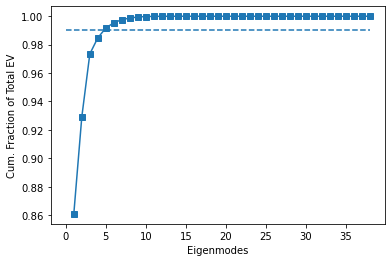

In [32]:
l, W = linalg.eig(C)
l = l.astype("double")

#explained_variance_ = (S ** 2) / (n_samples - 1)
#total_var = explained_variance_.sum()
#explained_variance_ratio_ = explained_variance_ / total_var

#print(l.cumsum() / l.sum())
print(np.cumsum(l**2) / np.sum(l**2) / n_samples)
print((l**2) / np.sum(l**2) / n_samples)

plt.plot(range(1,39), l.cumsum() / l.sum(), "-s")
plt.hlines([0.99], 0, 38, ls="--")
plt.gca().set_xlabel("Eigenmodes")
plt.gca().set_ylabel("Cum. Fraction of Total EV")

In [ ]:
l

In [ ]:
W == W.T

In [61]:
r = 5

### Transformation of the design variables into the active subspace (dv_mat --> Y):

In [62]:
Y = np.dot(W[:r,:], dv_mat.T).T
Y.shape, dv_mat.shape

((924, 5), (924, 38))

In [36]:
Y = np.dot(W[:,:r], dv_mat.T).T
Y.shape, dv_mat.shape

ValueError: shapes (38,4) and (38,924) not aligned: 4 (dim 1) != 38 (dim 0)

In [71]:
Y = dv_mat @ W[:,:r]
Y.shape, dv_mat.shape

((924, 5), (924, 38))

In [ ]:
#Y = dv_mat @ pca.components_.T

In [ ]:
np.dot(W[0,:], dv_mat.T).T

In [ ]:
np.dot(dv_mat, W[0:10].T)

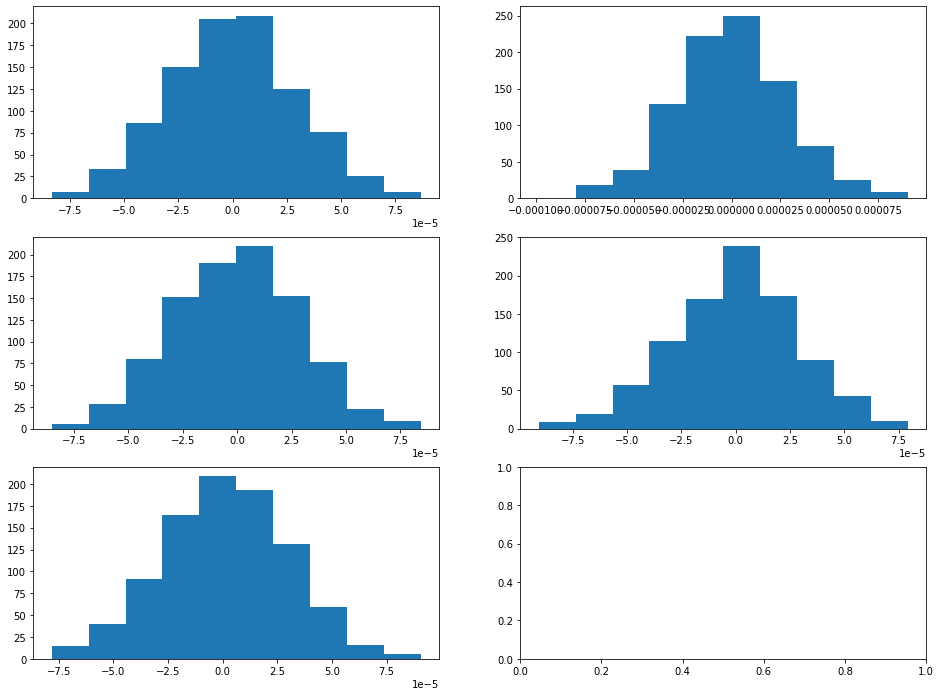

In [63]:
dimx = 2
dimy = int(np.ceil(r / dimx))


fig, axes = plt.subplots(dimy, dimx, figsize=(16, dimy*4))

#plt.gca().invert_yaxis()

for k, ax in enumerate(axes.flat):
    if k < r:
        ax.hist(Y[:,k])

In [ ]:
#plt.hist(Y2[:,1])

In [ ]:
#pca.singular_values_

In [41]:
aoa.shape

(924,)

In [72]:
Y2 = np.hstack((Y, aoa.to_numpy().reshape(-1,1))) 

### Split data into train and test sets:
 (Arguably, this should be done before the unsupervised learning part/PCA)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(Y2, c_D, test_size=0.2, random_state=3)


### Fit a GaussianProcessRegressor to the training data and evaluate for train and test data:

In [75]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


In [ ]:
ls = length_scale = [1.e-05]*r
ls

In [76]:
ls = 1. / l
ls = ls[:r]
ls = np.hstack((ls, 1.))
ls

array([0.00951256, 0.1197423 , 0.18490773, 0.72213545, 1.18658332,
       1.        ])

#### Unfortunately, the GPR is very sensitive to the choice of kernel

In [ ]:
kernel = Matern(length_scale=ls, nu=1.5) +  WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))

In [ ]:
#kernel = RBF(length_scale=ls) + Matern(length_scale=ls, nu=1.5) #+ WhiteKernel() #+ RBF()

In [ ]:
kernel = RBF() + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))# + ConstantKernel()

In [77]:
kernel = RBF(length_scale=ls, length_scale_bounds=(1e-09, 1e04)) + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-01))# + ConstantKernel()

In [82]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15, normalize_y=False)
gp.fit(x_train, y_train)
print(gp.kernel_)
print(gp.score(x_train, y_train))
print(gp.score(x_test, y_test))

print(gp.log_marginal_likelihood())

RBF(length_scale=[0.000616, 0.000386, 0.00065, 0.000585, 0.000571, 13.4]) + WhiteKernel(noise_level=2.33e-06)
0.9470467589534564
0.9109048454942066
3582.126626934566


### Plot the prediction result of the GPR for training and test data:

Text(0.5, 1.0, 'Validation Data')

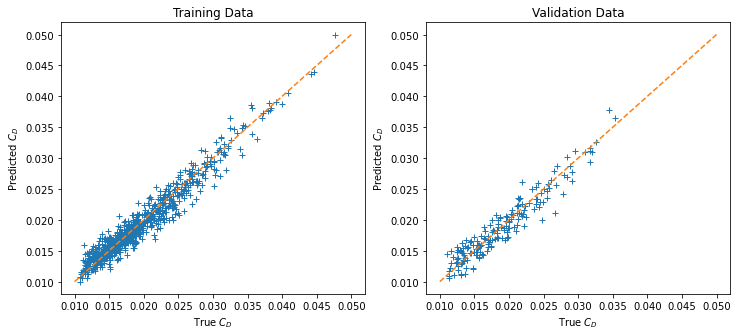

In [83]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

y_pred = gp.predict(x_train)
#plt.plot(y_pred)
plt.plot(y_train, y_pred, '+')
plt.plot([0.01, 0.05], [0.01, 0.05], "--")

#plt.gca().set_xlim([0.008, 0.042])
#plt.gca().set_ylim([0.008, 0.042])
ax1 = plt.gca()
ax1.set_ylabel("Predicted $C_D$")
ax1.set_xlabel("True $C_D$")
ax1.set_title("Training Data")

plt.subplot(1, 2, 2)

y_pred = gp.predict(x_test)
#plt.plot(y_pred)
plt.plot(y_test, y_pred, '+', label="asd")
plt.plot([0.01, 0.05], [0.01, 0.05], "--")
#plt.plot(y_pred, 'o', c="r")
ax1.set_xlim(plt.gca().get_xlim())
ax1.set_ylim(plt.gca().get_ylim())
ax2 = plt.gca()
ax2.set_ylabel("Predicted $C_D$")
ax2.set_xlabel("True $C_D$")
ax2.set_title("Validation Data")